# Tarea 1

Juan Pablo Rodas carnet 23007421

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape

(1460, 81)

In [62]:
dataHP_Final = dataHP

## Imputacion

se filtraran las columnas que tienen mas de un 5% de valores null en ellas

In [17]:
cols_rescatables = [col for col in dataHP.columns if (dataHP[col].isnull().mean() <= 0.05)]
len(cols_rescatables)

70

In [67]:
dataHP_Final = dataHP[cols_rescatables]

de las columnas rescatables cuales son las que aun tienen nulls

In [23]:
cols_con_na = [col for col in cols_rescatables if (dataHP[col].isnull().mean() > 0)]
cols_con_na

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

se observa el tipo de datos de las columnas sobre las que se hara la imputacion

In [24]:
dataHP[cols_con_na].dtypes

MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
dtype: object

### Imputacion para datos numericos

In [27]:
dataHP['MasVnrArea'].isnull().mean()

0.005479452054794521

In [29]:
media = dataHP['MasVnrArea'].mean()
mediana = dataHP['MasVnrArea'].median()

print(media)
print(mediana)

103.68526170798899
0.0


In [53]:
dataHP_num = pd.DataFrame()

dataHP_num['MasVnrArea']=dataHP['MasVnrArea']
dataHP_num['MasVnrArea_Mean'] = np.round(dataHP['MasVnrArea'].fillna(media))
dataHP_num['MasVnrArea_Median'] = np.round(dataHP['MasVnrArea'].fillna(mediana))

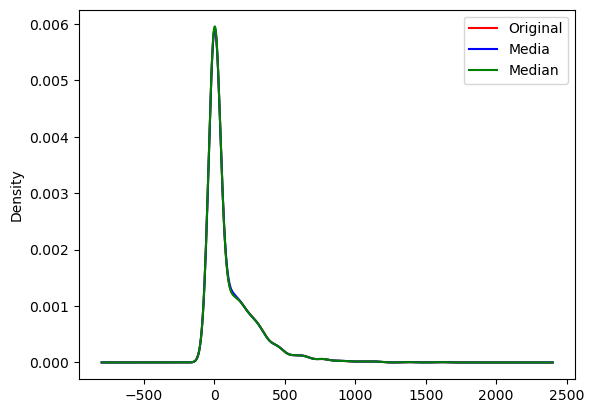

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP_num['MasVnrArea'].plot.density(color='red', label='Original')
dataHP_num['MasVnrArea_Mean'].plot.density(color='blue', label='Media')
dataHP_num['MasVnrArea_Median'].plot.density(color='green', label='Median')
plt.legend()

no hay mayor diferencia entre hacer una pintutacion con media o mediana, por lo que se hara una imputacion por media en el dataset final

In [ ]:
dataHP_Final['MasVnrArea'] = np.round(dataHP_Final['MasVnrArea'].fillna(media))

In [69]:
dataHP_Final['MasVnrArea'].isnull().mean()

0.0

### Imputacion para variables categoricas